Random forests bootstrap the data and randomly select features. bootstrapping means that it samples a data-set with the same size as the original dataset, but with replacement. So if you have N data points, each tree will use N data points, but some my be duplicated (as it samples them one by one with replacement).

# Classification Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/harjotspahwa/Car-Evaluation/refs/heads/master/car_evaluation.csv")
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [3]:
X = pd.get_dummies(df.drop("class", axis=1)).to_numpy()
y = df["class"].to_numpy()

In [4]:
from mlkit.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [5]:
from mlkit.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_features=None, random_state=42, n_jobs=-2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

100%|██████████| 1000/1000 [00:48<00:00, 20.51it/s]


{'accuracy': 0.9869942196246533,
 'precision': 0.9645252976810393,
 'recall': 0.9615985984571125,
 'f1': 0.9630597199068958}

In [6]:
y_test

array(['unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'good', 'unacc', 'good', 'unacc', 'vgood',
       'unacc', 'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc',
       'unacc', 'vgood', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'good', 'acc', 'unacc', 'good',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', '

In [7]:
model.predict(X_test)

array(['unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'good', 'acc', 'good', 'unacc', 'vgood', 'unacc',
       'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'unacc',
       'vgood', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'vgood', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'good', 'acc', 'unacc', 'good', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'good', 'unacc', 'unacc', 'acc', 'unac

In [8]:
np.unique(y_test)

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [9]:
model.predict_proba(X_test)

array([[0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.997, 0.   , 0.003, 0.   ],
       ...,
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   ],
       [0.679, 0.095, 0.179, 0.047]])

In [10]:
model.get_feature_importance()

{0: 0.0,
 1: 0.0485532600244363,
 2: 0.03590469843385538,
 3: 0.016744418527157613,
 4: 0.08598522714650672,
 5: 0.044443518827057646,
 6: 0.010607575252693546,
 7: 0.018785404865044986,
 8: 0.15256025769188047,
 9: 0.06224314117516384,
 10: 0.019604576252360326,
 11: 0.019410196601132957,
 12: 0.013884260801954904,
 13: 0.11261523936465623,
 14: 0.0,
 15: 0.1256803287792958,
 16: 0.034308008441630566,
 17: 0.06079917805176052,
 18: 0.12398644896145729,
 19: 0.013884260801954904,
 20: 0.0}

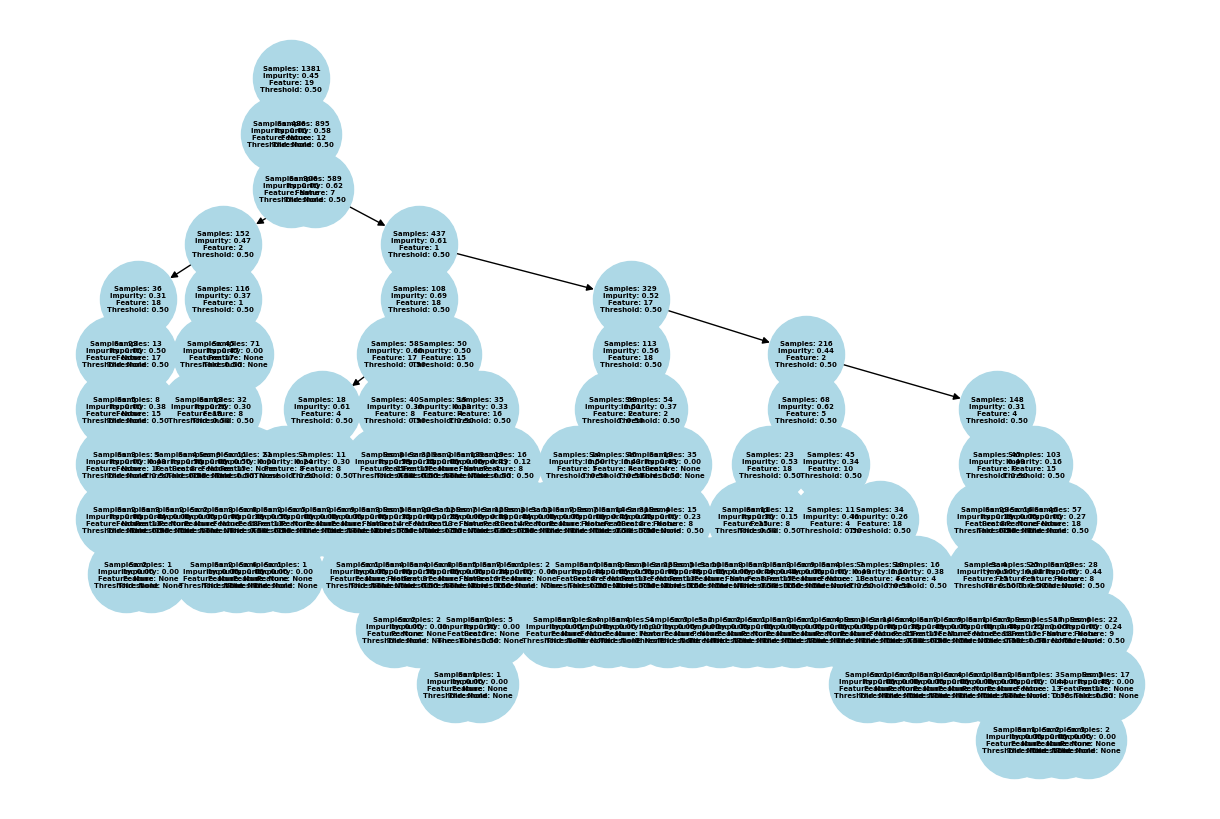

In [11]:
model.plot_tree(100)

# Regression Dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/refs/heads/master/data/petrol_consumption.csv")
X = df.drop("Petrol_Consumption", axis=1)
feature_names = list(X.columns)
X = X.to_numpy()
y = df["Petrol_Consumption"].to_numpy()

In [4]:
from mlkit.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [5]:
from mlkit.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=2000, max_features=None, random_state=42, n_jobs=-2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

100%|██████████| 2000/2000 [00:21<00:00, 92.92it/s] 


{'mae': 44.73263333333331,
 'mse': 3351.7237432166644,
 'rmse': 57.89407347230513,
 'r2': 0.6345540861772576}

In [6]:
from sklearn.ensemble import RandomForestRegressor

modelsk = RandomForestRegressor(n_estimators=2000, max_features=None, random_state=42, n_jobs=-2)
modelsk.fit(X_train, y_train)
modelsk.score(X_test, y_test)

0.5244900408434734

In [16]:
model.predict(X_test)

array([579.654 , 611.6665, 651.415 , 522.805 , 622.445 , 477.895 ,
       438.353 , 785.7625, 565.459 , 782.3485, 457.3295, 625.491 ,
       620.532 , 560.318 , 697.6465])

In [17]:
y_test

array([561, 640, 644, 547, 699, 580, 464, 865, 524, 649, 467, 632, 566,
       574, 648], dtype=int64)

In [18]:
model.get_feature_importance()

{0: 0.0, 1: 0.5672166848144736, 2: 0.19913728117932825, 3: 0.23364603400619818}

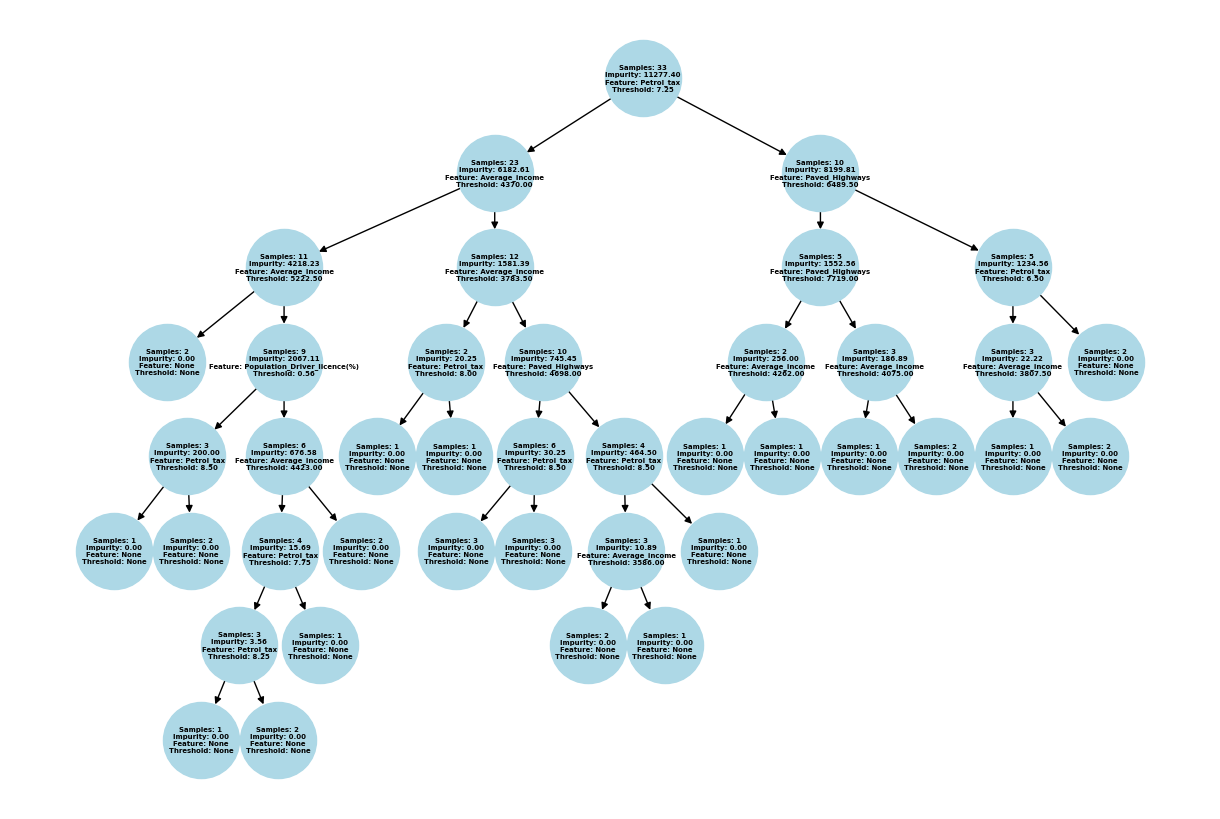

In [19]:
model.plot_tree(1000, feature_names=feature_names)

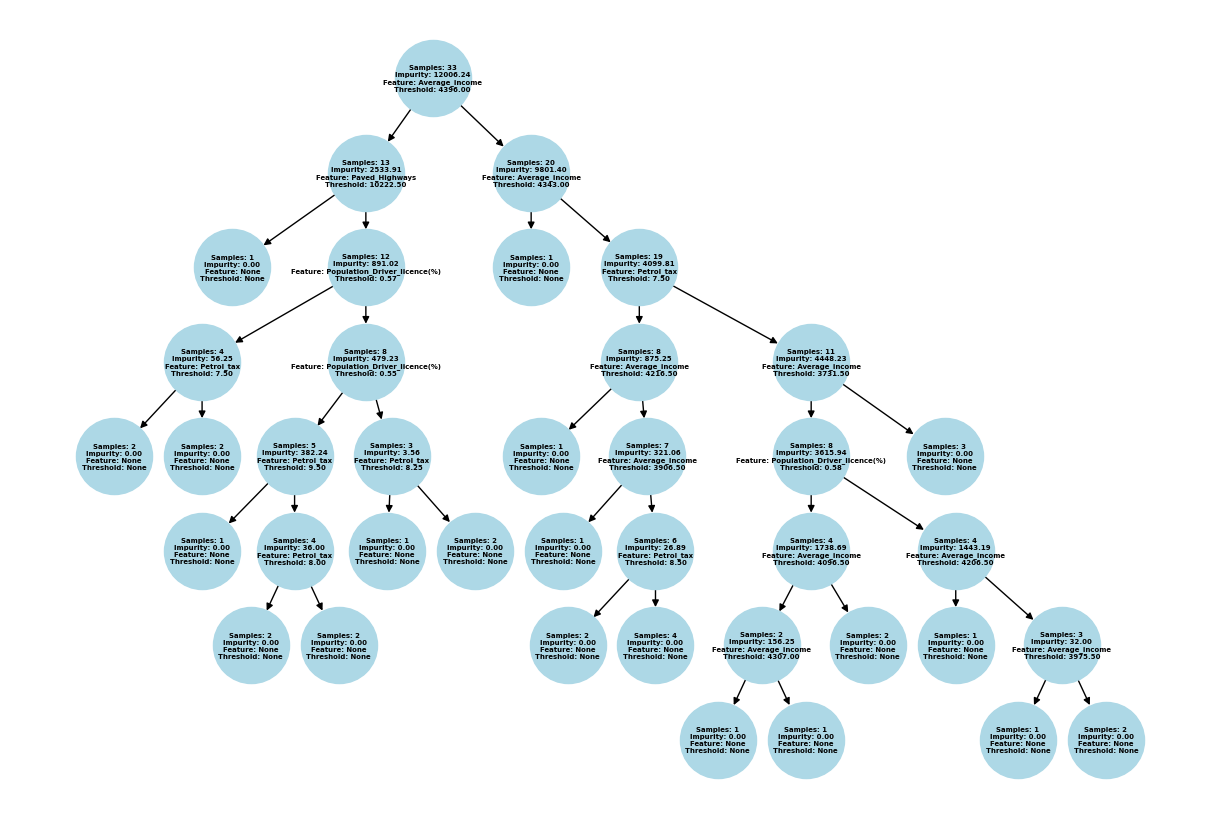

In [20]:
model.plot_tree(1001, feature_names=feature_names)